In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

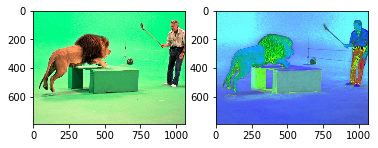

In [2]:
def read_rgb_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

I = read_rgb_image("lion.jpg")
J = read_rgb_image("lionHSV.jpg")
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I)
ax2.imshow(J)

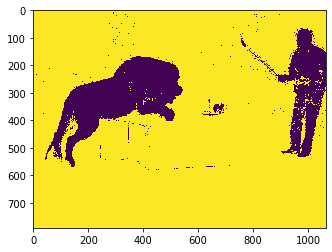

In [3]:
B = J[:, :, 0].astype('float64') / 255.
ones = np.logical_and(B > 0.22, B < 0.45)
B[B <= 0.22] = 0
B[B >= 0.45] = 0
B[ones] = 1
plt.imshow(B)

In [4]:
data = np.loadtxt('data.txt')
print(data.shape)

(841624, 4)


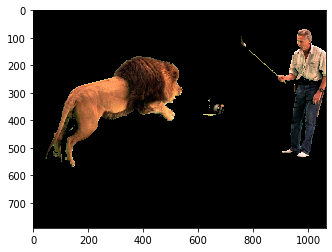

In [5]:
LUT = np.zeros((256, 256, 256))
for row in data:
    row = row.astype(np.uint8)
    LUT[row[0], row[1], row[2]] = 1 - row[3]

for y in range(I.shape[0]):
    for x in range(I.shape[1]):
        I[y, x] = LUT[I[y, x, 0], I[y, x, 1], I[y, x, 2]] * I[y, x]
        
plt.imshow(I)